In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
#Create a path to where your data is stored.
path = r'/Users/marika/Datasets'

In [3]:
#Import data
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')

In [4]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
#Import data
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [6]:
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather['BASEL_pleasant_weather']

In [8]:
#Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#Run the model with neighbors equal to 1 to 60 to test the accuracy.
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

I chose k=5 allows to achieve a model that is likely to generalize well, be stable against noisy data, and provide a practical balance between overfitting and underfitting. This choice aligns with common heuristics in KNN modeling, ensuring the model is robust and reliable while remaining computationally efficient.

In [10]:
print("Training Accuracies: ", train_acc)

Training Accuracies:  [1.         0.9299907  0.9363235  0.91930049]


<function matplotlib.pyplot.show(close=None, block=None)>

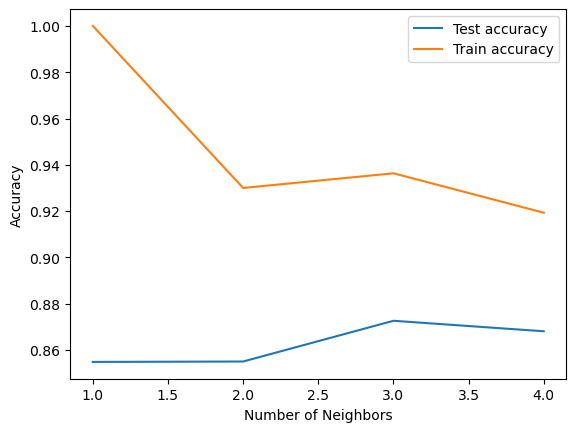

In [11]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

# Interpretation
The very high training accuracy at k=1 indicates that the model might be overfitting when k is too low, as it perfectly fits the training data but doesn't generalize well to the test data.
The increase in test accuracy as k increases from 1 to 3 suggests that the model is finding a better balance between bias and variance, leading to better generalization. However, the testing accuracy doesn't improve significantly after k=3, indicating that this might be an optimal or near-optimal choice for k in this scenario.

In [14]:
#Import data
df_scaled = pd.read_csv('/Users/marika/Data Sets/data_scaled.csv')

In [15]:
df_scaled

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,161,162,163,164,165,166,167,168,169,170
0,0,-1.731975,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,-1.731824,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,-1.731673,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,-1.731523,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,-1.731372,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,1.731372,1.715693,1.013583,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,1.731523,1.715699,1.013583,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,1.731673,1.715704,1.013583,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,1.731824,1.715710,1.013583,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [18]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_scaled.drop(['Unnamed: 0'], axis=1)
y = pleasant_weather['BASEL_pleasant_weather']

In [19]:
#Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Run the model with neighbors equal to 1 to 60 to test the accuracy.
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

I chose k=5 allows to achieve a model that is likely to generalize well, be stable against noisy data, and provide a practical balance between overfitting and underfitting. This choice aligns with common heuristics in KNN modeling, ensuring the model is robust and reliable while remaining computationally efficient.

In [21]:
print("Training Accuracies: ", train_acc)

Training Accuracies:  [1.         0.94085522 0.93934464 0.92911922]


<function matplotlib.pyplot.show(close=None, block=None)>

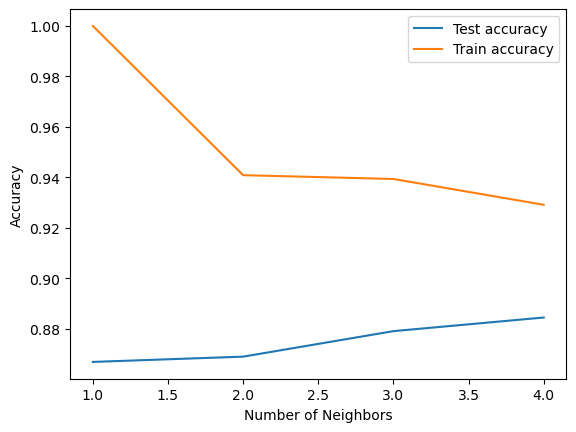

In [22]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

# Interpretation
This plot suggests that the KNN model benefits from using a slightly larger 𝑘 to improve generalization. 
𝑘=1 is clearly overfitting, while higher values lead to better performance on the test set, indicating improved generalization. However, to make a more informed choice, it might be beneficial to explore a slightly larger range of 𝑘 values beyond 4 to see where the test accuracy stabilizes.

# Comparing scaled and unscaled plots
# Unscaled Plot: 
Since the data is unscaled, the model may not have performed as well because the distances between points could be skewed by features with larger numerical ranges. The results are in less accurate predictions, especially on the test set, because the KNN model might not be considering all features equally.The test accuracy is generally lower across the k values. This suggests that the model is not generalizing well to unseen data, likely due to the influence of features with larger ranges dominating the distance calculations.The improvement in test accuracy as k increases is less pronounced, indicating that the model is struggling to find a stable relationship in the data, possibly because of the scale discrepancies.
# Scaled Plot: 
Since data has been scaled, this ensures that each feature contributes equally to the distance calculations, leading to more accurate predictions. The improved test accuracy in the second plot is likely a direct result of this scaling.The test accuracy is generally higher in this plot, indicating better generalization. This is because scaling the features allows the model to correctly assess the distances between points, leading to more reliable predictions. The test accuracy is generally higher in this plot, indicating better generalization. This is because scaling the features allows the model to correctly assess the distances between points, leading to more reliable predictions.The test accuracy increases more consistently with higher k values, suggesting that the model is better capturing the underlying structure of the data when all features contribute equally to the distance measure.

This underscores the need to scale features before applying KNN to ensure that the algorithm can effectively utilize all available data.